In [178]:
#!/usr/bin/env python
# coding: utf-8


#import modules for scikit learn, data frame viewing, etc. 
import math
import io
import pandas as pd  
import numpy as np  
import matplotlib
import matplotlib.pyplot as pp  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from statsmodels.api import OLS
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import scipy.stats
import scipy.optimize
import scipy.spatial
from sklearn import preprocessing
from sklearn.linear_model import ElasticNetCV
import numpy as np
from yellowbrick.regressor import AlphaSelection

In [179]:
#reads in csv file, data extracted using Scott's scraper
dataset = pd.read_csv('ff_dataQB2018.csv')
#prints description for our data set
pd.set_option('display.max_columns', 40)
dataset.describe()


,l_gp,l_points,l_owners,l_actual,l_passyds,l_passtd,l_passint,l_rushyds,l_rushtd,l_rush1st,l_recepts,l_recyds,l_rectd,l_rec1st,l_2pt,l_fumble,l_pointspg,l_passydpg,l_passtdpg,l_passintpg,l_rushydpg,l_rushtdpg,l_rush1stpg,l_receptspg,l_recydspg,l_rectdpg,l_rec1stpg,l_touchdown,l_runnerQB
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,13.256410,228.168462,44.128205,107.307692,3133.948718,20.512821,9.410256,190.615385,1.717949,14.820513,0.384615,0.923077,0.051282,0.153846,1.179487,2.717949,16.928597,235.423176,1.519470,0.739609,14.125614,0.124932,1.110872,0.029357,0.102962,0.003934,0.014827,3.071129,408.441386
std,3.345995,92.623968,42.170818,96.156713,1279.194688,10.903577,4.056950,178.047985,1.904962,10.978140,0.633095,4.675719,0.223456,0.365518,1.354754,1.891097,4.441306,65.587630,0.608811,0.323416,12.482285,0.139197,0.762932,0.049991,0.435520,0.017447,0.040023,2.050824,664.264671
min,5.000000,68.980000,0.000000,2.000000,64.000000,0.000000,1.000000,-16.000000,0.000000,1.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,4.951875,4.000000,0.000000,0.062500,-2.000000,0.000000,0.062500,0.000000,-0.687500,0.000000,0.000000,0.015625,0.250000
25%,11.000000,162.850000,3.500000,34.000000,2277.500000,11.500000,7.000000,70.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.054476,212.288462,1.156250,0.566964,5.406250,0.000000,0.598214,0.000000,0.000000,0.000000,0.000000,1.642578,40.206043
50%,14.000000,220.180000,24.000000,75.000000,3223.000000,21.000000,10.000000,131.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,17.721429,253.062500,1.562500,0.750000,9.857143,0.100000,0.937500,0.000000,0.000000,0.000000,0.000000,2.847656,108.755102
75%,16.000000,303.425000,91.500000,148.500000,4231.500000,28.000000,12.000000,276.500000,2.000000,19.500000,1.000000,0.000000,0.000000,0.000000,2.000000,4.000000,20.302188,275.756944,1.918831,0.968750,19.031250,0.187500,1.468750,0.062500,0.000000,0.000000,0.000000,3.876953,428.070312
max,16.000000,431.080000,100.000000,330.000000,5129.000000,50.000000,16.000000,695.000000,8.000000,45.000000,3.000000,21.000000,1.000000,1.000000,5.000000,7.000000,26.942500,320.562500,3.125000,1.500000,52.583333,0.666667,3.416667,0.200000,2.000000,0.090909,0.200000,10.562500,3211.111111


,l_points,Value
0,mean,228.168462
1,median,220.180000


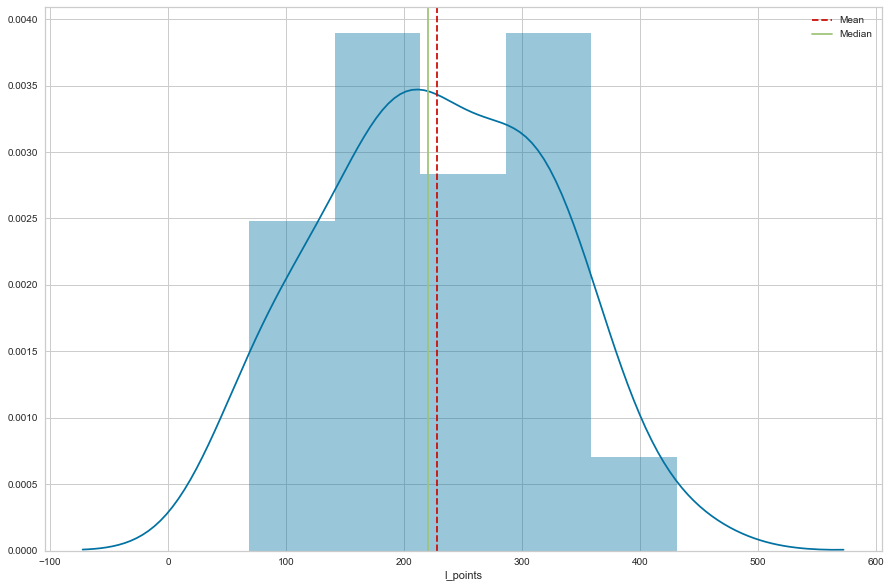

In [180]:
#describes values chosen 
vals = ["l_actual", "l_pointspg",  "l_passintpg", "l_fumble", "l_passydpg", "l_passintpg", "l_passtdpg", "l_rushydpg", "l_rushtdpg", "l_2pt","l_touchdown", "l_runnerQB"]
 
#predictors
X = dataset[vals].values
X = preprocessing.scale(X)

#target variable
y = dataset['l_points'].values

#Plot creation
pp.figure(figsize=(15,10))
pp.tight_layout()

seabornInstance.distplot(dataset['l_points'])
mean=dataset['l_points'].mean()
median=dataset['l_points'].median()

pp.axvline(mean, color='r', linestyle='--')
pp.axvline(median, color='g', linestyle='-')


pp.legend({'Mean':mean,'Median':median})

mmm = pd.DataFrame({'l_points': ['mean', 'median'], 'Value': [mean, median]})
display(mmm)

In [181]:
#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#summary Statistics Prior to Lasso
print(OLS(y_train,X_train).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.243
Model:                            OLS   Adj. R-squared (uncentered):             -0.174
Method:                 Least Squares   F-statistic:                             0.5826
Date:                Mon, 28 Oct 2019   Prob (F-statistic):                       0.821
Time:                        11:13:02   Log-Likelihood:                         -211.31
No. Observations:                  31   AIC:                                      444.6
Df Residuals:                      20   BIC:                                      460.4
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/kushgulati/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


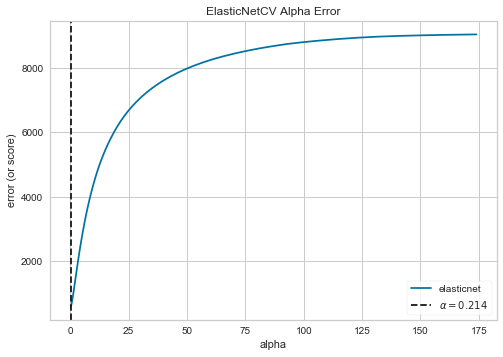

In [182]:
#Cross Validation for Elastic Model
ElasticModel = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv='warn', copy_X=True, verbose=0, n_jobs=None)
ElasticVisualizer = AlphaSelection(ElasticModel)
ElasticVisualizer.fit(X_train, y_train)
ElasticVisualizer.show()

In [183]:
#Prints ElasticNet Actual vs Predicted in Tabular Format 

print("ElasticNet Predict with transformations:")
clf = linear_model.ElasticNet(alpha=.214, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,  selection='cyclic')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


coefs = pd.DataFrame(clf.coef_, vals)
display(coefs)


print("Intercept: " + str(clf.intercept_))



ElasticNet Predict with transformations:


,0
l_actual,-44.118597
l_pointspg,12.740041
l_passintpg,-8.475219
l_fumble,4.848148
l_passydpg,1.861131
l_passintpg,-8.489479
l_passtdpg,9.044053
l_rushydpg,6.492082
l_rushtdpg,6.321235
l_2pt,6.358808


Intercept: 231.97648830464297


In [184]:
print("Elastic Residuals")
dfElastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

with pd.option_context("display.max_rows", 100):
    display(dfElastic)

Elastic Residuals


,Actual,Predicted
0,340.79,314.344329
1,170.84,232.524762
2,154.86,181.218686
3,120.92,101.107963
4,88.12,113.451596
5,192.54,209.543308
6,298.90,307.271893
7,203.53,259.550505


Lasso Graph


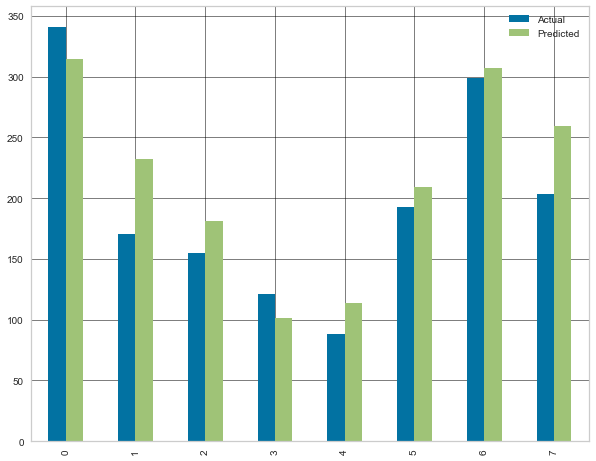

In [185]:
print("Lasso Graph")
dfLasso.plot(kind='bar',figsize=(10,8))
pp.grid(which='major', linestyle='-', linewidth='0.5', color='black')
pp.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
pp.show()

In [186]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 30.128557368830446
Mean Squared Error: 1216.3585518970433
Root Mean Squared Error: 34.87633225981544


In [188]:
import numpy as np
import statistics
from statistics import mean
from statistics import stdev
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
bootstrap_iter = 10000    # designate the number of iterations for bootstrapping

accuracy = []
coefs = []
clf = linear_model.ElasticNet(alpha=.214, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,  selection='cyclic')

for i in range(bootstrap_iter):
    X_, y_ = resample(X_train, y_train)
    clf.fit(X_, y_)
    y_pred = clf.predict(X_test)
    acc = metrics.mean_squared_error(y_test, y_pred)
    accuracy.append(acc)
    coefs.append(clf.coef_)
    

average = []
for i in range(len(clf.coef_)):
    avg =0
    for j in range(len(coefs)):
        avg += coefs[j][i]
    average.append(avg)


for x in range(len(average)):
    average[x] = average[x]/12


avgs = pd.DataFrame({'Average Coefficients': clf.coef_, 'Values': vals})

display(avgs)
                

print('Mean Squared Error:', mean(accuracy))
print('Standard Deviation:', stdev(accuracy))


,Average Coefficients,Values
0,-44.144721,l_actual
1,11.688171,l_pointspg
2,-6.906212,l_passintpg
3,2.228042,l_fumble
4,0.740706,l_passydpg
5,-6.905717,l_passintpg
6,6.428321,l_passtdpg
7,9.002984,l_rushydpg
8,12.102833,l_rushtdpg
9,12.005206,l_2pt


Mean Squared Error: 1413.5700705956474
Standard Deviation: 303.1723184273818
